<a href="https://colab.research.google.com/github/ROrodrigp/ProgramacionCienciaDatos/blob/main/Escalamiento_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se revisó el funcionamiento de PCA Y LDA 


In [ ]:
 import numpy as np 

x = np.array([0,1,2,3,4,5])

print('Normalizado: ',(x-x.min())/(x.max()-x.min()))
print('Estandarizado: ',(x-x.mean())/x.std())

Normalizado:  [0.  0.2 0.4 0.6 0.8 1. ]
Estandarizado:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df_wine=pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    , header=None)
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
#ALGORITMO 1.2#
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)#Ya estandarizamos




In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals: ',eigen_vals)
#Ya tenemos descompuesta la matriz de covarianzas 

Eigenvals:  [4.93963903 2.35884106 1.53467483 0.92797852 0.81532876 0.62439317
 0.55357038 0.3844865  0.09844718 0.26917772 0.1671087  0.22659582
 0.2054494 ]


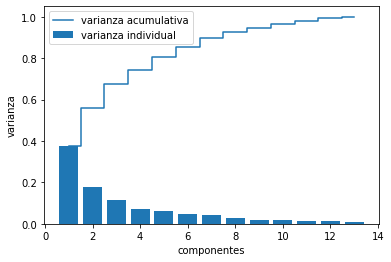

In [ ]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) #Ordenar los eigenvalores
plt.bar(range(1,14),var_exp, label = 'varianza individual',align='center')
plt.step(range(1,14),cum_var_exp, where='mid',label='varianza acumulativa')
plt.xlabel('componentes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

In [ ]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[i]) for i in range(len(eigen_vals))]
eigen_par.sort(key = lambda k: k[0], reverse = True)
#Ya ordenamos eigen valores y eigen vectores 

In [ ]:
#Seleccionar k eigenvalores
w = np.hstack( (eigen_par[0][1][:,np.newaxis],
              eigen_par[1][1][:,np.newaxis]))

print('W = \n',w)

W = 
 [[ 0.15139239 -0.25707658]
 [ 0.50186466  0.1897393 ]
 [-0.06053523  0.03984509]
 [ 0.28619571  0.00131925]
 [-0.03782912  0.71573234]
 [-0.31024673 -0.435175  ]
 [ 0.01318685  0.19606308]
 [-0.43202437 -0.10015661]
 [-0.06008714  0.02738745]
 [-0.49553935  0.26471509]
 [ 0.26423853 -0.17552536]
 [ 0.15253807 -0.03421594]
 [ 0.11347732 -0.20831487]]


In [ ]:
print('Original: ',X_train_std[0])
print('Proyectado: ',X_train_std[0].dot(w))

Original:  [ 1.46334925 -0.7656242   0.36993846 -0.95196803  0.56395011  1.59970095
  1.90160419 -0.37316449  0.49607068  1.55880501  1.24041814  0.34587458
  2.90662009]
Proyectado:  [-0.8807826  -0.79910686]


In [ ]:
X_train_pca = X_train_std.dot(w)
#X_train_pca

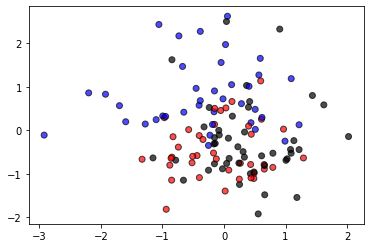

In [ ]:
color = np.array(['lime','red','black','blue','cyan'])
y = y_train[:][0]
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], alpha=0.7,c=color[y.astype(int)],edgecolor='black')


In [ ]:
#sklearn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_wine=pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    , header=None)



In [ ]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:],df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


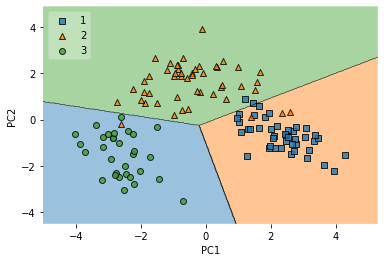

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train, clf = lr,legend=2)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


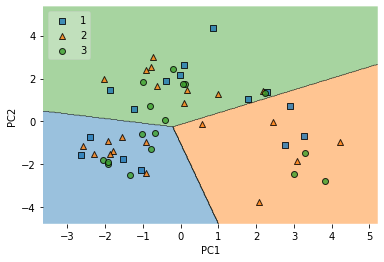

In [ ]:
plot_decision_regions(X_test_pca, y_test, clf = lr,legend=2)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:
#Linear Discriminant Analysis LDA
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df_wine=pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
    , header=None)
 
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)


from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
lr = LogisticRegression()

X_train_lda = lda.fit_transform(X_train_std, y_train) #Ya entrenamos el modelo lDA
X_test_lda = lda.transform(X_test_std)
lr.fit(X_train_lda, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'LDA2')

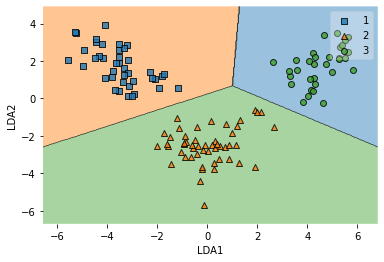

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda, y_train, clf = lr)
plt.xlabel('LDA1')
plt.ylabel('LDA2')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'LDA2')

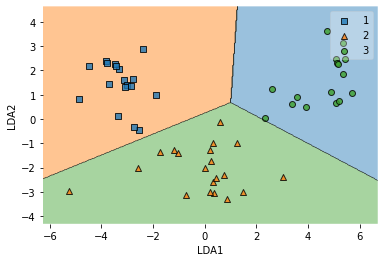

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_lda, y_test, clf = lr)
plt.xlabel('LDA1')
plt.ylabel('LDA2')

In [ ]:
#Kernel PCA con RBF
import scipy 
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
def rbf_kpca(x, gamma, n_components):
  sq_dists = pdist(x, 'sqeuclidean')
  mat_sq_dists = squareform(sq_dists)
  k = np.exp(-gamma * mat_sq_dists)
  #Centrar 
  N = k.shape[0]
  one_n = np.ones((N,N)) / N
  k = k - one_n.dot(k)  - k.dot(one_n) + one_n.dot(k).dot(one_n)

  eigen_vals, eigen_vecs = eigh(k)
  eigen_vals, eigen_vecs = eigen_vals[::-1], eigen_vecs[:,::-1]

  print(eigen_vals.shape, ' : ', eigen_vecs.shape)

  #Seleccionar K 
  alphas = np.column_stack([eigen_vecs[:,i] for i in range(n_components)])
  lambdas = np.column_stack([eigen_vals[i] for i in range(n_components)])

  return alphas, lambdas

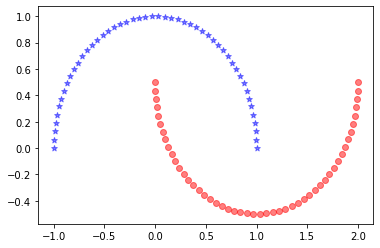

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100,random_state = 123)
plt.scatter(X[y==0,0],X[y==0,1],color='blue',marker='*',alpha = 0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='red',marker='o',alpha=0.5)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


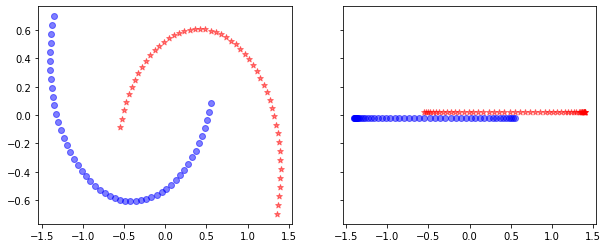

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4),sharey=True)
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],color='red',marker='*',alpha = 0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((50,1))+0.02,color='red',marker='*',alpha = 0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)

#PCA no puede separar estos conjuntos porque no son separables 

(100,)  :  (100, 100)


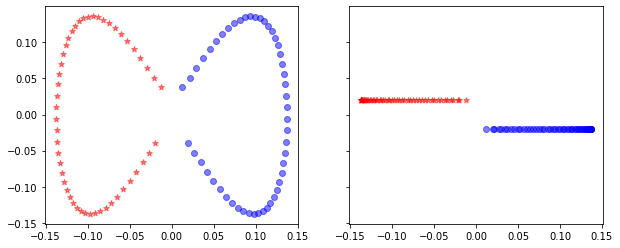

In [ ]:
X_kpca, l = rbf_kpca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4),sharey=True)
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='*',alpha = 0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02,color='red',marker='*',alpha = 0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)



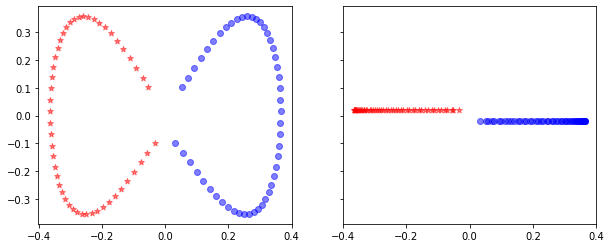

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4),sharey=True)
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='*',alpha = 0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02,color='red',marker='*',alpha = 0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,color='blue',marker='o',alpha=0.5)

